## Fig. S5D

In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.4

matplotlib.rcParams['xtick.major.size'] = 0.5 # length of major xticks
matplotlib.rcParams['xtick.major.width'] = 0.25   # width of major xticks
matplotlib.rcParams['ytick.major.size'] = 0.5  # length of major yticks
matplotlib.rcParams['ytick.major.width'] = 0.25   # width of major yticks


# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

from tqdm import tqdm
import pickle
from sparrow import Protein
import protfasta

In [2]:
from finches  import Mpipi_frontend
from finches import CALVADOS_frontend
mf = Mpipi_frontend()
cf = CALVADOS_frontend()

/Users/alex/Dropbox/WASHU/Holehouse/tools/finches/finches/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )


/Users/alex/Dropbox/WASHU/Holehouse/tools/finches/finches/finches/frontend/frontend_base.py:1319: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


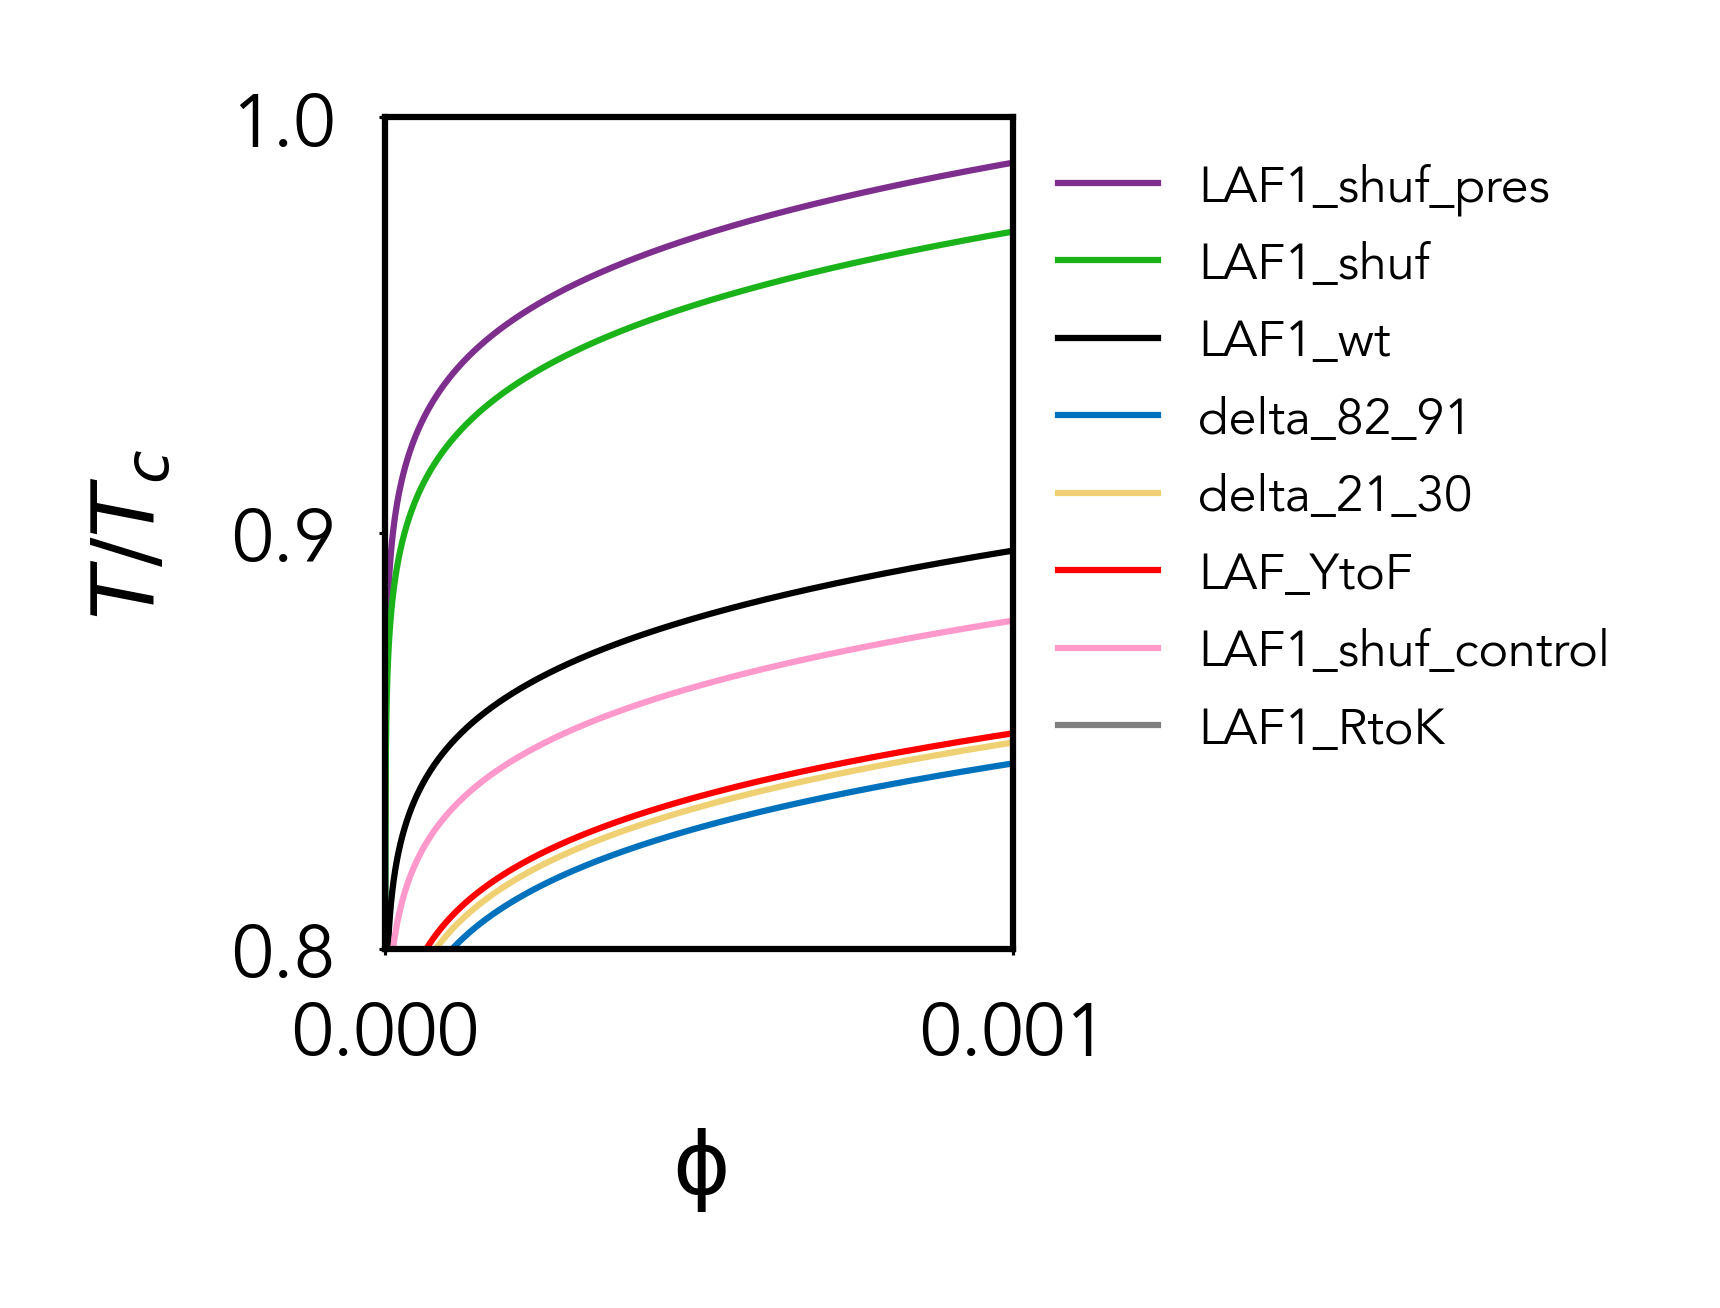

In [3]:

LAF1_RtoK = 'MESNQSNNGGSGNAALNKGGKYVPPHLKGGDGGAAAAASAGGDDKKGGAGGGGYKKGGGNSGGGGGGGYDKGYNDNKDDKDNKGGSGGYGKDKNYEDKGYNGGGGGGGNKGYNNNKGGGGGGYNKQDKGDGGSSNFSKGGYNNKDEGSDNKGSGKSYNNDKKDNGGDGLE'

LAF_YtoF = 'MESNQSNNGGSGNAALNRGGRFVPPHLRGGDGGAAAAASAGGDDRRGGAGGGGFRRGGGNSGGGGGGGFDRGFNDNRDDRDNRGGSGGFGRDRNWEDRGFNGGGGGGGNRGFNNNRGGGGGGFNRQDRGDGGSSNFSRGGFNNRDEGSDNRGSGRSFNNDRRDNGGDGLE'

LAF1_shuf_control = 'MSGGARNNRSGSNGGGHFSGGRGGYGYGDGQYRDAGGSARRDDGNGGGGGRENGDNRYSYQLGNRGDYANNGSAGGDGGNGGRDGDRGESRNDNRDRGERGGSRRGNGVNAGGYAGRDGPNGNNGYDNGYGGYYGRNGSRGADGGRDGNLGNARSNDGGDRRNGPGGSLE'

LAF1_wt  = 'MESNQSNNGGSGNAALNRGGRYVPPHLRGGDGGAAAAASAGGDDRRGGAGGGGYRRGGGNSGGGGGGGYDRGYNDNRDDRDNRGGSGGYGRDRNYEDRGYNGGGGGGGNRGYNNNRGGGGGGYNRQDRGDGGSSNFSRGGYNNRDEGSDNRGSGRSYNNDRRDNGGDGLE'

LAF1_shuf = 'MNNSGDNDRGSGNYGLRNSFGDDGYGDNGNDEGNSGYRNRGLGGDRADEYGNSGGNGDNEAAPNASDRDDAHYYDSDDYDDGGGGRGSGGAGGGGARGPGSNRAGRYGGGGRRGRGRGNGYNGNRSQRRRGGGRGRGNRGYRVGNGNGQSGGRNSRGGGGGNGGANYGLE'

LAF1_shuf_pres = 'MGGYGYGSSGDGGGDDYGDARYVPPHLRGYGDGAGDDGGDNNDDSDDADRDYNGGLSGGAGGNSGGDGENGGDGNGRNNARSGNNRGGNGNYRYFGANYGAGEGRGRNGQGGEGSGNNRGGGGRYGRRRRQGSRGGRGSGGNYGGNSNRSGRAGGRDNNARNRRRNGSLE'

delta_82_91 = 'MESNQSNNGGSGNAALNRGGRYVPPHLRGGDGGAAAAASAGGDDRRGGAGGGGYRRGGGNSGGGGGGGYDRGYNDNRDDRDDRNYEDRGYNGGGGGGGNRGYNNNRGGGGGGYNRQDRGDGGSSNFSRGGYNNRDEGSDNRGSGRSYNNDRRDNGGDGLE'
delta_21_30 = 'MESNQSNNGGSGNAALNRGGDGGAAAAASAGGDDRRGGAGGGGYRRGGGNSGGGGGGGYDRGYNDNRDDRDNRGGSGGYGRDRNYEDRGYNGGGGGGGNRGYNNNRGGGGGGYNRQDRGDGGSSNFSRGGYNNRDEGSDNRGSGRSYNNDRRDNGGDGLE'

eps_LAF1_RtoK = mf.epsilon(LAF1_RtoK,LAF1_RtoK)
eps_LAF_YtoF = mf.epsilon(LAF_YtoF,LAF_YtoF)
eps_LAF1_wt = mf.epsilon(LAF1_wt,LAF1_wt)
eps_LAF1_shuf  = mf.epsilon(LAF1_shuf,LAF1_shuf)
eps_LAF1_shuf_pres = mf.epsilon(LAF1_shuf_pres,LAF1_shuf_pres)



seq_dict = {}
seq_dict['LAF1_shuf_pres'] = [LAF1_shuf_pres,'#7E2F8E']
seq_dict['LAF1_shuf'] = [LAF1_shuf,'#1BB31A']
seq_dict['LAF1_wt'] = [LAF1_wt, '#000000']
seq_dict['delta_82_91'] = [delta_82_91, '#0072BD']
seq_dict['delta_21_30'] = [delta_21_30, '#EFD072']
seq_dict['LAF_YtoF'] = [LAF_YtoF,'#FF0000']
seq_dict['LAF1_shuf_control'] = [LAF1_shuf_control,'#FF99CC']
seq_dict['LAF1_RtoK'] = [LAF1_RtoK,'grey']


x=mf.plot_multiple_phase_diagrams(seq_dict, tc_ref='LAF1_wt', ylim=[0.8, 1.0], xlim=[0,0.001], width=0.9, filename='out_figures/laf1_cdil.pdf')
